# Numerical Differentiation

As far as finding a derivative analytically is purely technical task, it is also useful to be able to establish some numerical approximations of the derivative (to analyze the trend or the rate of change of some real-life time series, e.g. currency exchange rate, etc.).

Baring that in mind one usually can solve two separate tasks: 
+ finding the derivative of a smooth function (assuming that the smoothness is given)
+ finding the derivative of distorted function (e.g. a signal with some random noise)

We propose you to try yourself in both tasks following our instructions.

## Derivative of smooth functions: Finite Differences

Assume that we have some nice smooth function $f(x)$ on a segment $I$. 

The simplest attempt to find the derivative stems from the definition of the derivative:
$$    
\lim\limits_{h \to 0} \frac{f(a+h)-f(a)}{h}=f'(a) 
$$

Thus we can come up with an idea of the approximation:
$$    
f'(a)\approx \frac{f(a+h)-f(a)}{h}
$$
This formula is called **forward differences**.

### Task 1. Forward differences implementation

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

You need to write a function with the following signature:
```
def derForward(f, I, h) 
```
This function should get as input function $f$ and segment $I$ as Python list of two elements --- ends of the segment. 

In the function you are asked to divide the segment $I$ into small segments of length $h$, thus getting a grid $x$. Your function should return `dy` --- forward differences for each point `x` (except the border since the formula asks for the next value). You should return both `x` and `dy` arrays of the same length.

In [3]:
def derForward(f, I, h):
    '''
         f(a + h) - f(a)
    dy = ---------------
               h
    '''
    # your code goes here
    x = np.arange(I[0], I[1], h) # including the left boundary and excluding the right boundary
    dy = np.empty_like(x)
    for i, x_i in enumerate(x):
        dy[i] = (f(x_i + h) - f(x_i)) / h
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checkerpub
checkerpub.findif_check(derForward)

Test 1 |::|  err= 0.004999976659897233   |::|  time:  0.0 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 1.715675908387758   |::|  time:  0.0 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 0.009999270029526776   |::|  time:  0.0 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


### Task 2. Backward differences

Similarly to forward differences, one can formulate **backward differences**:
$$
f'(a)\approx \frac{f(a)-f(a-h)}{h}
$$

Modify your function to get backward differences. **Note: your `x` should be different since now you ask for previous point!**

In [5]:
def derBackward(f, I, h):
    '''
         f(a) - f(a - h)
    dy = ---------------
               h
    '''
    # your code goes here
    x = np.arange(I[0] + h, I[1] + h, h) # excluding the left boundary (one step forward) and including the right boundary
    dy = np.empty_like(x)
    for i, x_i in enumerate(x):
        dy[i] = (f(x_i) - f(x_i - h)) / h
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [6]:
checkerpub.findif_check(derBackward)

Test 1 |::|  err= 0.004999961624300377   |::|  time:  0.0009958744049072266 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 0.8114210722356563   |::|  time:  0.0 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 0.009998070131516726   |::|  time:  0.0 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


### Task 3. Symmetrical Differences

Essentially, one could try to bring forward/backward asymmetry together. This method is called **symmetrical differences**:
$$
f'(a) \approx \frac{f(a+h)-f(a-h)}{2h}
$$
Despite the fact we lose two poins now, let us also implement this method (we compare them below):

In [7]:
def derSymmetrical(f, I, h):
    '''
     
         f(a + h) - f(a - h)
    dy = -------------------
                2h
    '''
    # your code goes here
    x = np.arange(I[0] + h, I[1], h) # excluding both the left and the right boundaries
    dy = np.empty_like(x)
    for i, x_i in enumerate(x):
        dy[i] = (f(x_i + h) - f(x_i - h)) / (2 * h)
    return x, dy

Run the following cell to get automatic basic check of your function (do not change it!):

In [8]:
checkerpub.findif_check(derSymmetrical)

Test 1 |::|  err= 1.666658042798197e-05   |::|  time:  0.000985860824584961 s
Test 1 |::|  accuracy OK
Test 2 |::|  err= 0.2120248268547722   |::|  time:  0.0 s
Test 2 |::|  accuracy OK
Test 3 |::|  err= 6.505335679740654e-05   |::|  time:  0.0 s
Test 3 |::|  accuracy OK
Passed:  3 / 3


**Have you noticed that errors changed?** Let us illustrate it.

## Task 4. Compare by eyes

Assume we want to experiment with $f(x)=\sin(x)$. Let $I=[0, 2\pi]$ and $h=1/10$. Compute:
+ forward differences
+ backward differences
+ symmetrical differences

If we plot all results with the right answer ($f'(x)=\cos(x)$), we should get picture like this:

![target](tmp.png)

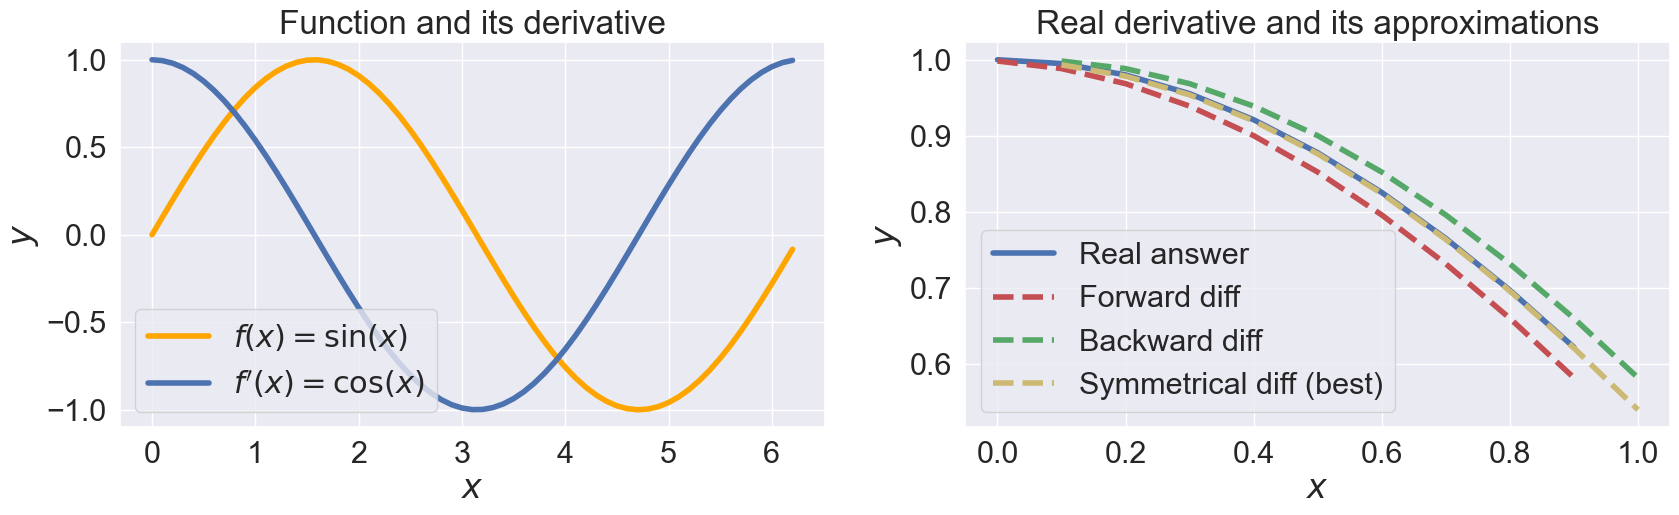

In [9]:
I = [0, 2 * np.pi]
h = 0.1
x = np.arange(I[0], I[1], h)
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(x, np.sin(x), color='orange', label='$f(x) = \sin(x)$')
plt.plot(x, np.cos(x), color='b', label="$f'(x) = \cos(x)$")
plt.title('Function and its derivative')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

# your code goes here
f_x = lambda x: np.sin(x)
x_forward = np.arange(I[0], I[1], h)
dy_forward = derForward(f_x, I, h)[1]
x_backward = np.arange(I[0] + h, I[1] + h, h)
dy_backward = derBackward(f_x, I, h)[1]
x_symmetrical = np.arange(I[0] + h, I[1], h)
dy_symmetrical = derSymmetrical(f_x, I, h)[1]
plt.subplot(1, 2, 2)
plt.plot(x[:10], np.cos(x)[:10], 'b-', label='Real answer')
plt.plot(x_forward[:10], dy_forward[:10], 'r--', label='Forward diff')
plt.plot(x_backward[:10], dy_backward[:10], 'g--', label='Backward diff')
plt.plot(x_symmetrical[:10], dy_symmetrical[:10], 'y--', label='Symmetrical diff (best)')
plt.title('Real derivative and its approximations')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

**As we have seen by tests above, symmetrical differences are the most accurate.** You can also experiment with $f(x)=x^x$ below:

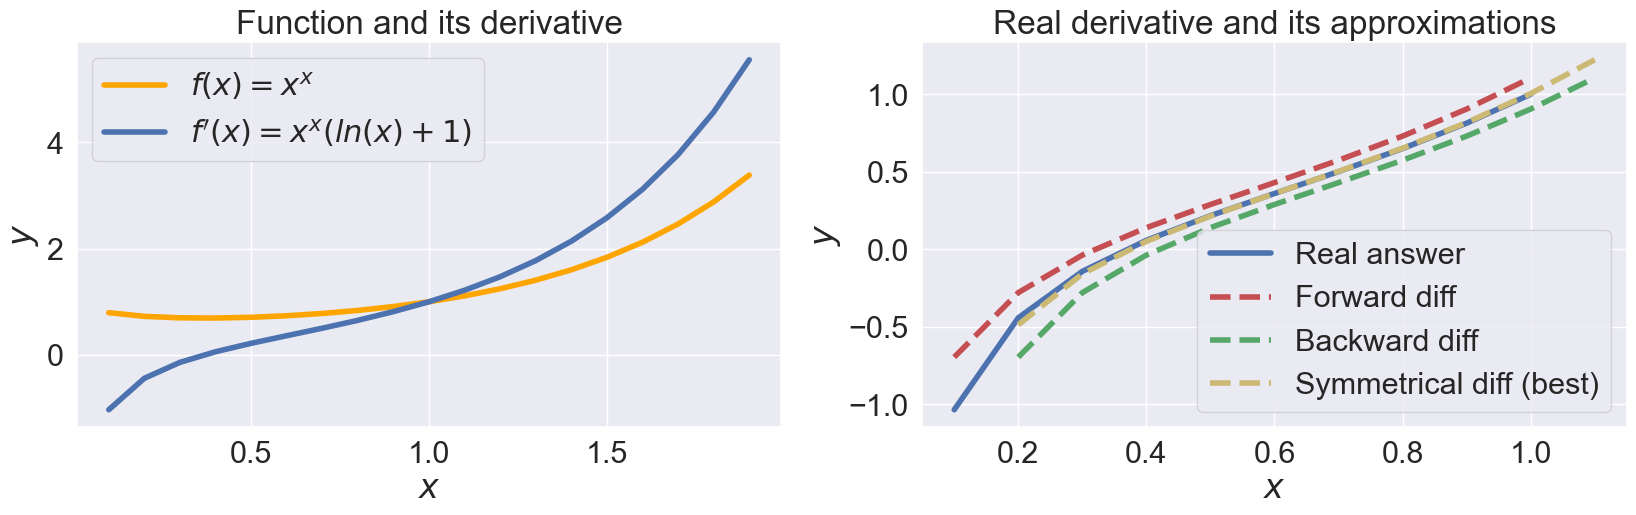

In [10]:
# optional experiment
I = [0.1, 2]
h = 0.1
x = np.arange(I[0], I[1], h)
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(x, x ** x, color='orange', label='$f(x) = x^x$')
plt.plot(x, x ** x * (np.log(x) + 1), color='b', label="$f'(x) = x^x (ln(x) + 1)$")
plt.title('Function and its derivative')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

# your code goes here
f_x = lambda x: x ** x
x_forward = np.arange(I[0], I[1], h)
dy_forward = derForward(f_x, I, h)[1]
x_backward = np.arange(I[0] + h, I[1] + h, h)
dy_backward = derBackward(f_x, I, h)[1]
x_symmetrical = np.arange(I[0] + h, I[1], h)
dy_symmetrical = derSymmetrical(f_x, I, h)[1]
plt.subplot(1, 2, 2)
plt.plot(x[:10], (x ** x * (np.log(x) + 1))[:10], 'b-', label='Real answer')
plt.plot(x_forward[:10], dy_forward[:10], 'r--', label='Forward diff')
plt.plot(x_backward[:10], dy_backward[:10], 'g--', label='Backward diff')
plt.plot(x_symmetrical[:10], dy_symmetrical[:10], 'y--', label='Symmetrical diff (best)')
plt.title('Real derivative and its approximations')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

## Task 5. Error estimation

Using **Taylor expansion**, one can show the following estimations:

1) $ \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

2) $ \left| \frac{f(a)-f(a-h)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

3) $ \left| \frac{f(a+h)-f(a-h)}{2h} -f'(a) \right| \le \frac{h^2}{6}M  $
where $M=\max_{x\in[a;a+h]} f'''(x)$;

This is a point-wise estimations, so we will use the maximal of them on the whole segment:
$$
\left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \to \max_{a\in I} \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right|=Err(h)
$$

For different values of $h$ estimate errors for **forward** and **symmetrical** differences (use $f(x)=\sin(x)$):

In [11]:
"""
                     | f(a + h) - f(a)         |    h
Err_forward(h) = max | --------------- - f'(a) | <= - max(f''(x)) for x in [a, a+h]
                     |        h                |    2

                                                             2
                         | f(a + h) - f(a - h)         |    h
Err_symmetrical(h) = max | ------------------- - f'(a) | <= - max(f'''(x)) for x in [a, a + h]
                         |         2h                  |    6
"""
hs = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])
errs_forward = []
theor_errs_forward = []
errs_symmetrical = []
theor_errs_symmetrical = []
I = [0, 2 * np.pi]
f_x = lambda x: np.sin(x) # f(x) = sin(x)
f1_x = lambda x: np.cos(x) # f'(x) = cos(x)
f2_x = lambda x: -np.sin(x) # f''(x) = -sin(x)
f3_x = lambda x: -np.cos(x) # f'''(x) = -cos(x)
print(f'Differentiation errors for the 1st derivative of sin(x) over [0, 2*pi] and step sizes: {", ".join(hs.astype(str))}')
print('----------------------------------------------------------------------------------------------------------------------------------')
print('Step\tErr forw\tTheory\t\t Delta\t\tErr symm\tTheory\t\t Delta')
for h in hs:
    # your code goes here
    x = np.arange(I[0], I[1], h)
    # Forward differences errors
    dy_forward = derForward(f_x, I, h)[1] # Approx derivative
    err_forward = abs(dy_forward - f1_x(x)).max()
    errs_forward.append(err_forward) # Find max of abs error; excl right boundary
    theor_err_forward = f2_x(x).max() * (h / 2)
    theor_errs_forward.append(theor_err_forward)
    # Symmetrical differences errors
    dy_symmetrical = derSymmetrical(f_x, I, h)[1] # Approx derivative
    err_symmetrical = abs(dy_symmetrical - f1_x(x)[1:]).max()
    errs_symmetrical.append(err_symmetrical) # Find max of abs error; excl both left and right boundaries
    theor_err_symmetrical = f3_x(x).max() * (h ** 2 / 6)
    theor_errs_symmetrical.append(theor_err_symmetrical)
    print(f'{h:.0e}\t{err_forward:.4e}\t{theor_err_forward:.4e}\t{(theor_err_forward - err_forward):11.4e}\t{err_symmetrical:.4e}\t{theor_err_symmetrical:.4e}\t{(theor_err_symmetrical - err_symmetrical):11.4e}')

Differentiation errors for the 1st derivative of sin(x) over [0, 2*pi] and step sizes: 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06
----------------------------------------------------------------------------------------------------------------------------------
Step	Err forw	Theory		 Delta		Err symm	Theory		 Delta
1e+00	4.7248e-01	4.7946e-01	 6.9863e-03	1.5694e-01	1.6500e-01	 8.0562e-03
1e-01	4.9975e-02	4.9996e-02	 2.1012e-05	1.6644e-03	1.6652e-03	 8.3241e-07
1e-02	5.0000e-03	5.0000e-03	 1.8503e-09	1.6667e-05	1.6667e-05	 8.3312e-11
1e-03	5.0000e-04	5.0000e-04	-2.3212e-11	1.6667e-07	1.6667e-07	-1.0189e-13
1e-04	5.0000e-05	5.0000e-05	-1.2802e-13	1.6690e-09	1.6667e-09	-2.3306e-12
1e-05	5.0000e-06	5.0000e-06	-1.0111e-11	5.5555e-11	1.6667e-11	-3.8888e-11
1e-06	5.0011e-07	5.0000e-07	-1.0990e-10	1.8143e-10	1.6667e-13	-1.8126e-10


Since we want to show that:
$$
Err(h) \sim h^\gamma
$$
it is essential to use `loglog` scale: if you take logarithm from both sides, you get:
$$ \ln Err(h) \sim \gamma \ln h $$
a straight line. Acquiring $\gamma$ is negative, it is better to plot it against not $h$, but $1/h$ or $|I|/h$.

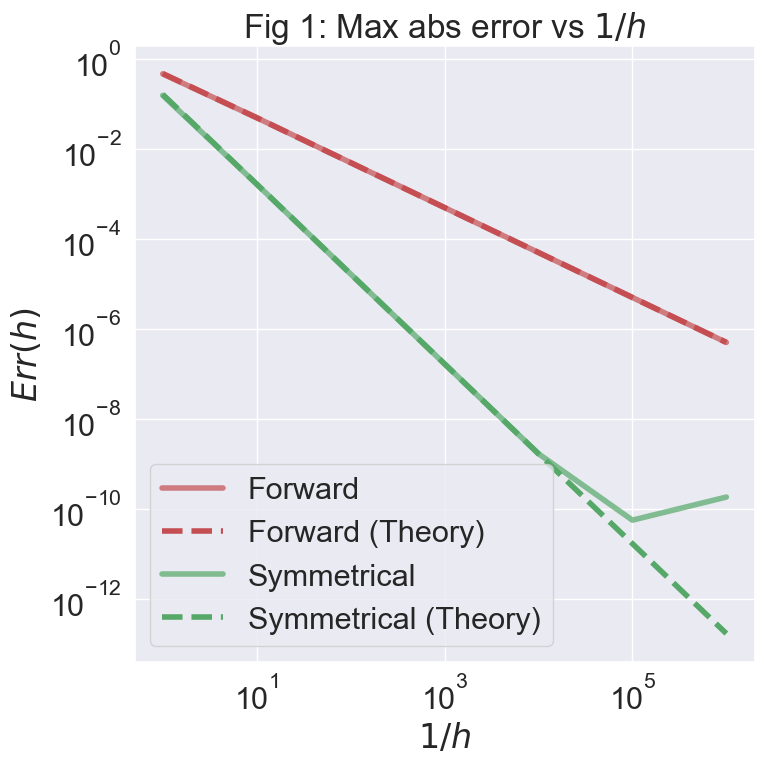

In [12]:
plt.figure(figsize=(8,8))

#your code goes here
plt.plot(1 / hs, errs_forward, 'r-', alpha=0.7, label='Forward')
plt.plot(1 / hs, theor_errs_forward, 'r--', label='Forward (Theory)')
plt.plot(1 / hs, errs_symmetrical, 'g-', alpha=0.7, label='Symmetrical')
plt.plot(1 / hs, theor_errs_symmetrical, 'g--', label='Symmetrical (Theory)')
plt.yscale('log')
plt.xscale('log')
plt.title('Fig 1: Max abs error vs $1/h$')
plt.xlabel('$1/h$')
plt.ylabel('$Err(h)$')
plt.legend();

## Task 6. Derivative of Noised function

Assume that we got somehow noised $\sin(x)$ function from real-life source, e.g.:

In [13]:
x, data = checkerpub.getNoised(n=1000, alpha=0.1, sigma=0.1)

Here:
+ `n` is a number of points on the $[0, 10]$ segment;
+ `alpha` is a parameter of autoregression; in a way, it refers to the memory of the noise -- how long it "remembers" distorted values; if this parameter is close to $1$, function will sufficiently diverge from the initial $\sin(x)$;
+ `sigma` is the dispersion of the noise.

Let us plot it

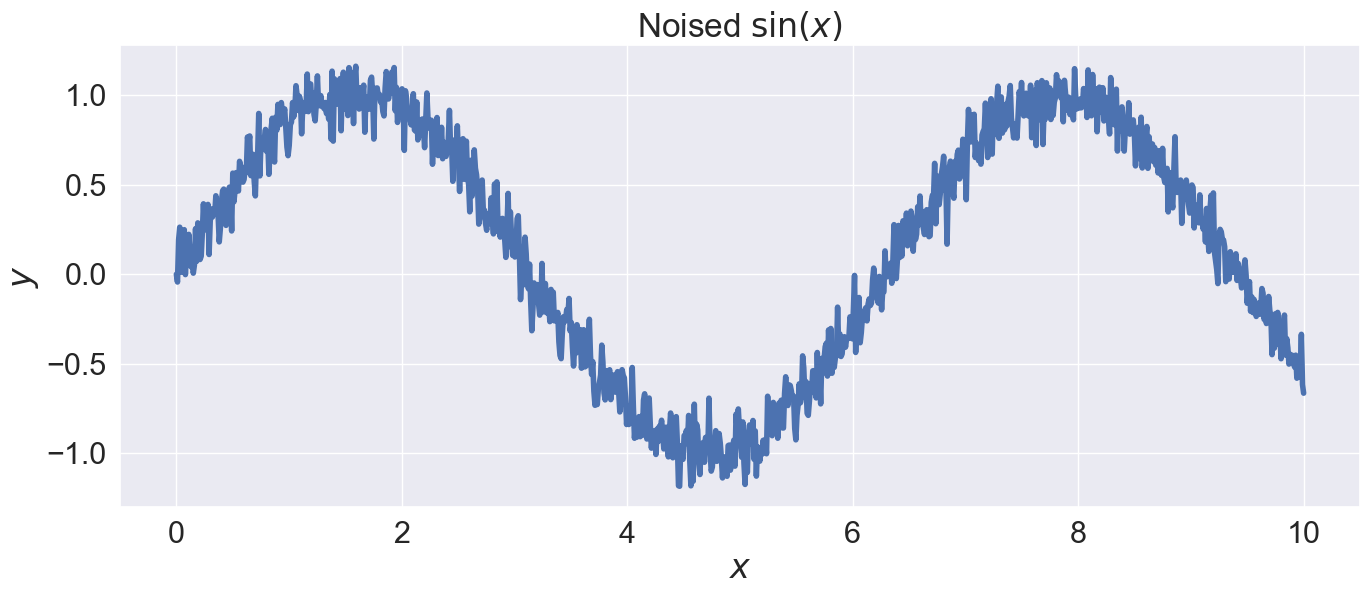

In [14]:
plt.figure(figsize=(16,6))
plt.plot(x, data, 'b-')
plt.title('Noised $\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$');

You can try to apply finite differences to this function. The result will be catastrophically large due to the noise: our function stopped being smooth. Hence, we need more stable mechanism of finding a derivative.

The idea is the following:

1. By the definition of differentiability, differentiable function can be approximated by piecewise-linear;

2. Assume we have this approximation. If we consider some heighbourhood of the given point $a$, then the approximation is not _piecewise linear_ --- it is just linear! And it is easy to differentiate linear function.

Formally one should do the following: 

+ we characterize the neightbourhood by half-window length `hw`, thus for the `i`-point in array we are considering `[i-hw:i+hw]` window

+ in such a window one should find the closest approximating line and determine its coefficient; it's an approximation of the derivative

**Note**: you do not need the knowledge of the formula of the coefficient: since we stated here `Linear Regression` problem, you can use already written one

**Note**: you can always choose not to use it, so we write the formula here:
$$
\kappa=\frac{n \sum_{i=1}^n (x_iy_i)-\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{n\sum_{i=1}^n x^2_i-\left( \sum_{i=1}^n x_i \right)^2}
$$


In [15]:
def derWindow(x, y, hw):
    # your code goes here
    df = np.empty_like(y)
    for i, (x_i, y_i) in enumerate(zip(x, y)):
        left = max(i - hw, 0) # Limit the left boundary index by zero
        right = min(i + hw, x.shape[0] - 1) # Limit the right boundary index by x array size minus one since indexing starts from zero
        df[i] = (y[right] - y[left]) / (x[right] - x[left]) # Tangent = line's slope = derivative
    return x, df

Let us try to check ourselves. If we choose smooth enough function (e.g. $\sin x$) then our sliding derivative technique should be close to real derivative (with reasonable `hw`). Check your function for different `hw`; you may also change $\sin x$.

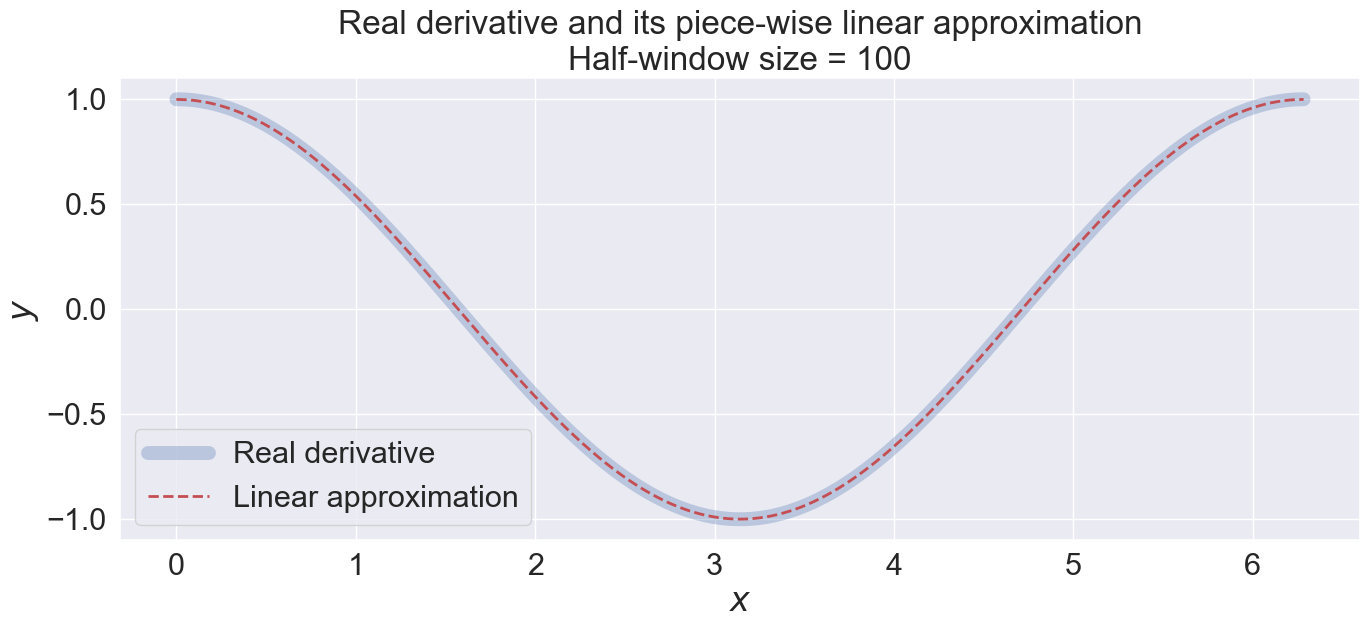

In [16]:
x_test = np.linspace(0, 2 * np.pi, 10000)
hw = 100
y_test = np.sin(x_test)
der_true = np.cos(x_test)
x_new, der_new = derWindow(x_test, y_test, hw)

plt.figure(figsize=(16,6))
plt.plot(x_test, der_true, 'b-', linewidth=10, alpha=0.3, label='Real derivative')
plt.plot(x_new, der_new, 'r--', linewidth=2, label='Linear approximation')
plt.title(f'Real derivative and its piece-wise linear approximation\nHalf-window size = {hw}')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend();

### Task 7. Plot results

Let us also plot results for three different half-window sizes: 50, 10 and 200.
    
**Please, try to use different colors and styles to make a nice picture!** You should get something close to:

![](tmp2.png)

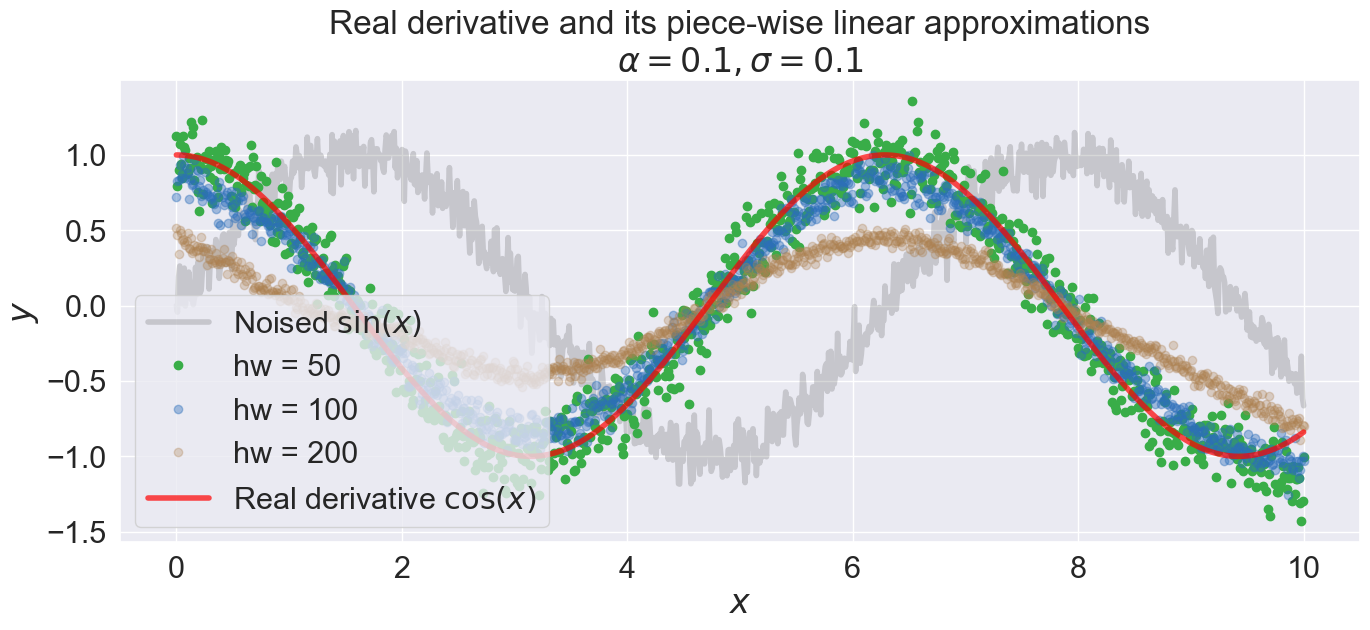

In [17]:
plt.figure(figsize=(16,6))
plt.plot(x, data, color='xkcd:dark grey', alpha=0.2, label='Noised $\sin(x)$')

# your code goes here
hws = {50: ['xkcd:medium green', 1], 100: ['xkcd:medium blue', 0.4], 200: ['xkcd:light brown', 0.3]}
for hw in hws:
    x_new, der_new = derWindow(x, data, hw)
    plt.plot(x_new, der_new, 'o', color=hws[hw][0], alpha=hws[hw][1], label=f'hw = {hw}')
plt.plot(x, np.cos(x), color='red', alpha=0.7, label='Real derivative $\cos(x)$')
plt.title(f'Real derivative and its piece-wise linear approximations\n$\\alpha = 0.1, \\sigma = 0.1$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower left');

It is also interesting to play with different `alpha` and `sigma`. You are welcome to do it here:

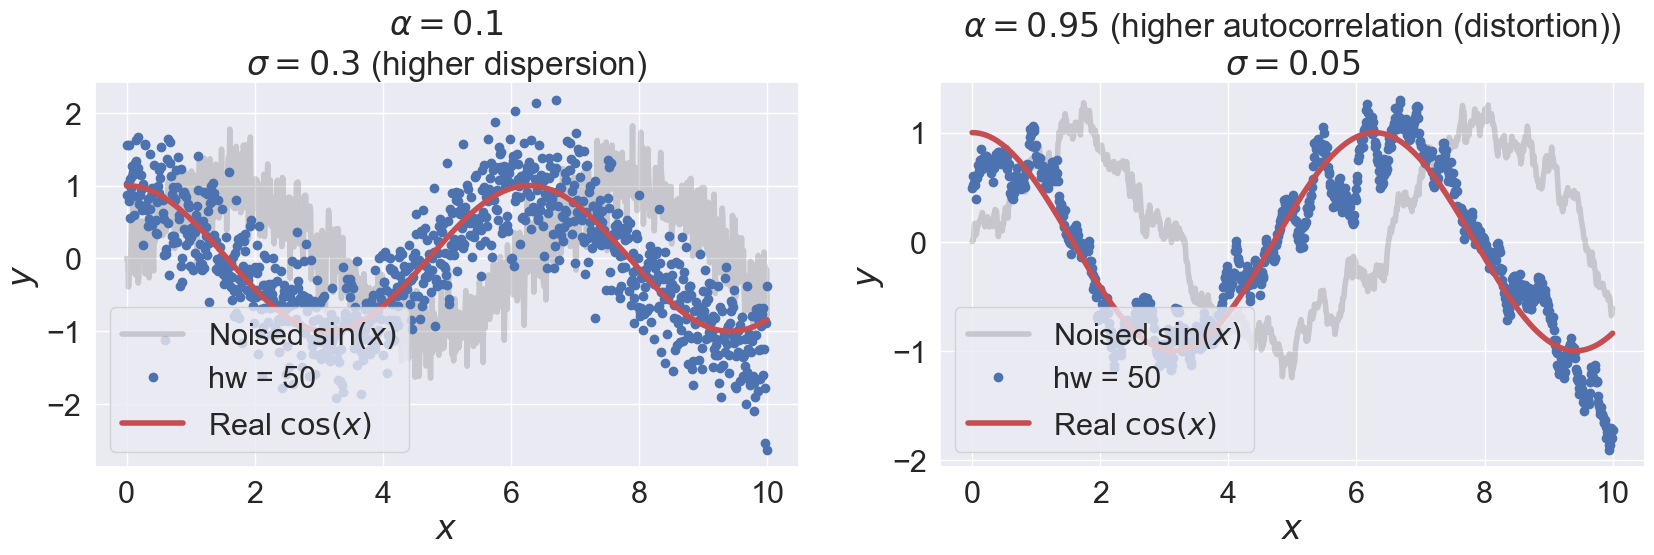

In [18]:
# optional experiment
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
alpha = 0.1
sigma = 0.3
x, data = checkerpub.getNoised(n=1000, alpha=alpha, sigma=sigma)
plt.plot(x, data, color='xkcd:dark grey', alpha=0.2, label='Noised $\sin(x)$')
hw = 50
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'bo', label=f'hw = {hw}')
plt.plot(x, np.cos(x), 'r-', label='Real $\cos(x)$')
plt.title(f'$\\alpha = {alpha}$\n$\\sigma = {sigma}$ (higher dispersion)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower left');

plt.subplot(1, 2, 2)
alpha = 0.95
sigma = 0.05
x, data = checkerpub.getNoised(n=1000, alpha=alpha, sigma=sigma)
plt.plot(x, data, color='xkcd:dark grey', alpha=0.2, label='Noised $\sin(x)$')
hw = 50
x_new, der_new = derWindow(x, data, hw)
plt.plot(x_new, der_new, 'bo', label=f'hw = {hw}')
plt.plot(x, np.cos(x), 'r-', label='Real $\cos(x)$')
plt.title(f'$\\alpha = {alpha}$ (higher autocorrelation (distortion))\n$\\sigma = {sigma}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower left');


## Task 8. Results

Please, answer the following questions:

1. Does theoretical estimations of the error coincide with your experiments? If there is a divergence from a straight line, how can it be explained?

2. What can you say about optimal window length in the last part of the experiment? Is there any monotonic behaviour?

1. The theoretical estimations of the error coincide very well with the experiments. This is expected, since the calculated error should be less than or equal to the theoretical error upper boundary. Let's show that the calculated error ranking coincides with the theoretical error ranking among the two differentiation methods.
Theoretical error boundary of the Forward Differences method is $|E_F| \le \frac{h \cdot \max_{x \in [a, a+h]} f^{(2)}(x)}{2}$. Theoretical error boundary of the Symmetrical Differences method is $|E_S| \le \frac{h^{2} \cdot \max_{x \in [a, a+h]} f^{(3)}(x)}{6}$. The ratio of these two errors is $\frac{|E_S|}{|E_F|} = \frac{h \cdot \max_{x \in [a, a+h]} f^{(3)}(x)}{3 \cdot \max_{x \in [a, a+h]} f^{(2)(x)}} \Rightarrow |E_S| \sim h|E_F|$, which means that $|E_S|$ is roughly $h$ times bigger than $|E_F|$, but since $h \le 1$, in fact $|E_S|$ is roughly $1 / h$ times smaller than $|E_F|$. So, $|E_S| \le |E_F|$, and the plots clearly show this inequality.
    
    Also, the estimation error $Err$ is directly proportional to the step size $h$, i.e. the smaller the step of differentiation the smaller the error (accuracy is higher) -- see Fig1. However, for very small values of the step size the error begins to increase, thus the $Err(h)$ is not always a straight line for all step sizes. This is clearly seen for the symmetrical differences approximation where initially the error decreases rapidly as the step size decreases ($1/h$ increases), but then the line breaks at $h = 10^{-5}$ and the error for $h = 10^{-6}$ is higher than for $h = 10^{-5}$. This is because of float point computation limitations. As the step size gets smaller, we need more decimal places to store the computation result to keep precision. Since not all float point numbers can be stored exactly in the computer memory, for example, the famous 0.1 + 0.2 = 0.30000000000000004 instead of correct value 0.3, the computation result may be not exactly correct for smaller step sizes, hence the estimation error may increase. As a solution, we may need to round computation results to some reasonable number of decimals or limit the minimal step size.
2. For the noised function differentiation, the optimal window length is 50, since the true derivative fits our estimated derivative the best. There is monotonic behavior: on the intervals where the noised function increases, the estimated derivative is greater than zero; on the intervals where the noised function decreases, the estimated derivative is less than zero.